------------------------------------------- NYC Shapfile:--------------------------------------------------
          tractid  tractnum  name             namelsad   nta  \
0     36005000100       100     1       Census Tract 1  BX98   
1     36005000200       200     2       Census Tract 2  BX09   
2     36005000400       400     4       Census Tract 4  BX09   
3     36005001600      1600    16      Census Tract 16  BX09   
4     36005001900      1900    19      Census Tract 19  BX39   
...           ...       ...   ...                  ...   ...   
2159  36085030301     30301   303  Census Tract 303.01  SI12   
2160  36085030302     30302   303  Census Tract 303.02  SI12   
2161  36085031901     31901   319  Census Tract 319.01  SI12   
2162  36085031902     31902   319  Census Tract 319.02  SI12   
2163  36085032300     32300   323     Census Tract 323  SI12   

                                               nta_name  bcode  \
0                                         Rikers Island  

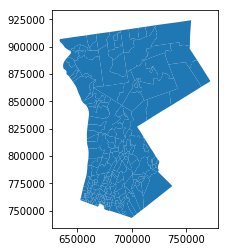

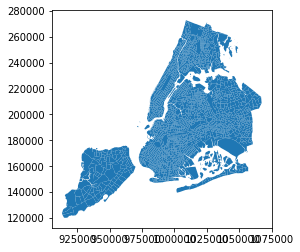

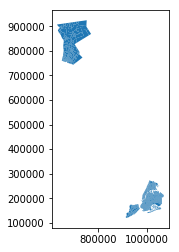

In [2]:
#%%     
# PLOTTING WITH GEOID, WESTCHESTER SHP NOT FOUND YET, NEED TO BLACK OUT BRROKLYN AND STATEN ISLAND
# Plotting the census tracts for all reports that appeared in a specific month                    
# import contextily as ctx
# import matploylib.pyplot as plt
import geopandas as gp
import os
import platform
import pandas as pd
import numpy as np

# A) CREATING DF AND GDF:
nycFile = "NYU_NYC_34505_SP/nyu_2451_34505.shp"
csvFile = "GasHistory_2010_ReportFrequency_Monthly.csv"
brooklynFile = "TIGER_2010_County_Shapefiles/BrooklynCounty_2010SHP/tl_2010_36047_tract10.shp"
statenFile = "TIGER_2010_County_Shapefiles/StatenIslanCounty_2010SHP"
westchesterFile = "TIGER_2010_County_Shapefiles/WestchesterCounty_2010SHP/tl_2010_36119_tract10.shp"
westchesterFile2 = "westchester2010/wctigtrt10.shp"
monthlyDF = pd.read_csv(csvFile)                                                                            # Read the csv file and make a data frame
nycGDF = gp.read_file(nycFile)                                                                           # Read the shape file and make a data frame
brooklynGDF = gp.read_file(brooklynFile)
statenGDF = gp.read_file(statenFile)
westchesterGDF = gp.read_file(westchesterFile)
westchesterGDF2 = gp.read_file(westchesterFile2)

GDF_GEOID_COL = "tractid"
DF_GEOID_COL  = "GEOID_SCT"
MIN_NUM_TRACTS_NEEDED_TO_PRINT = 150 #max westchester got in a month is 110

# B) ADDING NEW COLS TO nycGDF AND CHANGING DATATYPE OF COLS SO WE CAN COMPARE THEM:
nycGDF["MonthYear"] = str                                                                               # adding two new cols to nycGDF
nycGDF["TotalMonthlyReport" ] = int
nycGDF["CountyName"] = str 
nycGDF["CensusBlockID_list"] = str  
nycGDF["Ticket_list"] = str  
nycGDF["Classification_list"] = str  
nycGDF["Zipcode_list"] = str 
nycGDF["CountyTract"] = str
nycGDF[[GDF_GEOID_COL]] = nycGDF[[GDF_GEOID_COL]].apply(pd.to_numeric).astype(int)                                      # Turning GDF_GEOID_COL - the CensusTract number to numpy.int64 values so can query them
nycGDF[['tractid']] = nycGDF[['tractid']].apply(pd.to_numeric).astype(int)  
nycGDF[['tractnum']] = nycGDF[['tractnum']].apply(pd.to_numeric).astype(int)  
nycGDF[['name']] = nycGDF[['name']].apply(pd.to_numeric).astype(int) 
nycGDF[['bcode']] = nycGDF[['bcode']].apply(pd.to_numeric).astype(int) 
# print("======================================================================================================== RAW DATA: GDF and monthly DF ========================================================================================================")
# print(nycGDF)
# print("------------------------------------------------------------------------ monthly DF:------------------------------------------")
# print(monthlyDF)
# print("=============================================================================================================== RAW DATA END =================================================================================================================")

# # C) CON EDISON DOESNT INCLUDE DATA FROM STATEN ISLAND AND BROOKYLN SO GRAY THEM OUT
# # BROOKLYN OUTLINE GDF:
# print("\nMaking Brooklyn and Staten Island Outline Maps...")
# bkGeoidList = list()
# for row in range(0, len(brooklynGDF)):
#     bkGeoidList.append(int(brooklynGDF.iloc[row]["GEOID10"]))
# brooklynOutlineGDF = nycGDF.copy()
# brooklynOutlineGDF.drop(brooklynOutlineGDF.index, inplace=True)  
# skipGeoid = []
# for geoid in range(0, len(bkGeoidList)):        
#     bkGDF = nycGDF.loc[                                                                               # thisMonthsDF = df that contains all rows for that month-year
#         (nycGDF[GDF_GEOID_COL]  == bkGeoidList[geoid]) 
#     ]  
#     if len(bkGDF)==0:
#         print("******************* GEOID "+str(bkGeoidList[geoid])+" is in the Brooklyn nycFile but is not in NYU NYC nycFile")
#     skipGeoid.extend(bkGDF.index.tolist())
#     bkGDF = bkGDF.reset_index(drop=True)
#     brooklynOutlineGDF = brooklynOutlineGDF.append(bkGDF)
# brooklynOutlineGDF.reset_index(drop=True)
# # STATEN ISLAND OUTLINE GDF:
# print("\nMaking Brooklyn and Staten Island Outline Maps...")
# statenGeoidList = list()
# for row in range(0, len(statenGDF)):
#     statenGeoidList.append(int(statenGDF.iloc[row]["GEOID10"]))
# statenOutlineGDF = nycGDF.copy()
# statenOutlineGDF.drop(statenOutlineGDF.index, inplace=True)  
# skipGeoid = []
# for geoid in range(0, len(statenGeoidList)):        
#     statenGDF = nycGDF.loc[                                                                               # thisMonthsDF = df that contains all rows for that month-year
#         (nycGDF[GDF_GEOID_COL]  == statenGeoidList[geoid]) 
#     ]  
#     if len(statenGDF)==0:
#         print("******************* GEOID "+str(statenGeoidList[geoid])+" is in the Staten Island nycFile but is not in NYU NYC nycFile")
#     skipGeoid.extend(statenGDF.index.tolist())
#     statenGDF = statenGDF.reset_index(drop=True)
#     statenOutlineGDF = statenOutlineGDF.append(statenGDF)
# statenOutlineGDF.reset_index(drop=True)

# D.0) MERGE WESTCHESTER AND SHAPE GDF
print("------------------------------------------- NYC Shapfile:--------------------------------------------------")
print(nycGDF)
print("-------------------------------------- Westcheter County Shapfile:-----------------------------------------")
print(westchesterGDF2)
westchesterGDF2.plot()  # Westchester county map (connects directy with the nyc map)
nycGDF.plot()           # NYC map
ax = nycGDF.plot()
westchesterGDF2.plot(ax=ax)

#%%




# # D) POPULATE THE NEWLY CREATED COLS:
# print("\nPopulating new created columns and ploting monthly maps..")
# skipMonthIndex = []
# count = 0
# thisMonthPlotGDF = nycGDF.copy()
# # 0) GO THROUGH EACH ROW OF THE MONTHLY CSV DATA AND PULL OUT ALL ROWS THAT ARE IN THE SAME MONTH -> FROM EACH MINI MONTH SEPERATED DF, SEPERATE FUTHER BY COUNTY NAME -> USE THE GEOID OF EACH COUNTY TO NAME THE GDF FILE
# for row in range(0,len(monthlyDF)):
#     thisMonthPlotGDF.drop(thisMonthPlotGDF.index, inplace=True)                           # resetting the month df for this new month
#     if row in skipMonthIndex:
#         continue

#     # 1) SAME MONTH SEPERATION:
#     thisMonthsDF = monthlyDF.loc[                                                                               # thisMonthsDF = df that contains all rows for that month-year
#         (monthlyDF['MonthYear']  == monthlyDF['MonthYear'][row]) 
#     ]  

#     if len(thisMonthsDF) <= MIN_NUM_TRACTS_NEEDED_TO_PRINT:                                                                                  # If these r no reports for this month-year so skip
#         continue
#     skipMonthIndex.extend(thisMonthsDF.index.tolist())
#     thisMonthsDF = thisMonthsDF.reset_index(drop=True)
#     thisMonthGeoList = thisMonthsDF.GEOID_SCT.tolist()                                                          # need to put census tracts into an array, if i use directly from thisMonthsDF i get errors when there is no 
#     thisMonthStr = monthlyDF['MonthYear'][row]

#     # 2) SAME COUNTY SEPERATION:
#     skipCountyIndex = []
#     for row2 in range(0,len(thisMonthsDF)):
#         if row2 in skipCountyIndex:
#             continue
#         thisMonthsCountyDF = thisMonthsDF.loc[                                                                               # thisMonthsCountyDF = df that contains all rows for that month-year
#             (thisMonthsDF['CountyName_2010']  == thisMonthsDF['CountyName_2010'][row2]) 
#         ]      
#         if len(thisMonthsCountyDF) == 0:                                                                                  # If these r no reports for this month-year so skip
#             print("----------------- NO BLOCK FOR THIS COUNTY: "+thisMonthsDF['CountyName_2010'][row2])
#             continue
#         skipCountyIndex.extend(thisMonthsCountyDF.index.tolist())
#         thisMonthsCountyDF = thisMonthsCountyDF.reset_index(drop=True)
#         thisCountyStr = monthlyDF['CountyName_2010'][row]

#         # 3) FROM THE SEPERATED COUNTY MINI DF -> FIND THE GEOID AND POPULATE THE COLS
#         skipCountyGeoIdIndex = []
#         for row3 in range(0,len(thisMonthsCountyDF)):
#             if row3 in skipCountyGeoIdIndex:
#                 continue
#             thisMonthsCountyGeoGDF = nycGDF.loc[                                                                               # thisMonthsCountyDF = df that contains all rows for that month-year
#                 (nycGDF[GDF_GEOID_COL]  == thisMonthsCountyDF[DF_GEOID_COL][row3]) 
#             ]      
#             if len(thisMonthsCountyGeoGDF) == 0 and thisCountyStr != "Westchester County":                                                                                  # If these r no reports for this month-year so skip
#                 print("----------------- NO BLOCK FOR THIS COUNTY: ")#+thisMonthsCountyGeoGDF[GDF_GEOID_COL][row3])
#                 continue
#             skipCountyGeoIdIndex.extend(thisMonthsCountyGeoGDF.index.tolist())
#             thisMonthsCountyGeoGDF = thisMonthsCountyGeoGDF.reset_index(drop=True)
#             # 4) POPULATING THE COLS I ADDED
#             #  FROM THE MONTHLY CSV DATA FOR THE SAME GEOIDS
#             if len(thisMonthsCountyGeoGDF) != 0:
#                 thisMonthsCountyGeoGDF.at[0, "MonthYear"] = thisMonthsCountyDF.loc[row3]["MonthYear"]
#                 thisMonthsCountyGeoGDF.at[0, "TotalMonthlyReport"] = thisMonthsCountyDF.loc[row3]["TotalReports"]
#                 thisMonthsCountyGeoGDF.at[0, "CountyName"] = thisMonthsCountyDF.loc[row3]["CountyName_2010"]
#                 thisMonthsCountyGeoGDF.at[0, "CensusBlockID_list"] = thisMonthsCountyDF.loc[row3]["CensusBlockID_list"]
#                 thisMonthsCountyGeoGDF.at[0, "Ticket_list"] = thisMonthsCountyDF.loc[row3]["Ticket_list"]
#                 thisMonthsCountyGeoGDF.at[0, "Classification_list"] = thisMonthsCountyDF.loc[row3]["Classification_list"]
#                 thisMonthsCountyGeoGDF.at[0, "Zipcode_list"] = thisMonthsCountyDF.loc[row3]["Zipcode_list"]
#                 thisMonthsCountyGeoGDF.at[0, "CountyTract"] = thisMonthsCountyGeoGDF.iloc[0]["CountyName"]+"-"+str(thisMonthsCountyGeoGDF.iloc[0]["namelsad"]).split(" ")[2]   # Add "CountyName-TractNum" to the col
#             thisMonthPlotGDF = thisMonthPlotGDF.append(thisMonthsCountyGeoGDF)
#         thisMonthPlotGDF = thisMonthPlotGDF.reset_index(drop=True)
#     countyTract_list = list()                                                            #
#     for i in range(0, len(thisMonthPlotGDF)):
#         countyTract_list.append(thisMonthPlotGDF.iloc[i]["CountyTract"])
#     thisMonthPlotGDF.to_csv("del_month.csv")

#     # 5) PLOT THE MONTH'S DATA:
#     figx = 14
#     figy = 13
#     ax = nycGDF.plot(alpha=0.05, edgecolor='black', linewidth = 0.6, figsize = (figx,figy))
#     ax = brooklynOutlineGDF.plot(alpha=0.2, ax=ax, figsize = (figx,figy), color="black")
#     ax = statenOutlineGDF.plot(alpha=0.2, ax=ax, figsize = (figx,figy), color="black")
#     map = thisMonthPlotGDF.plot(column='TotalMonthlyReport',cmap = 'Reds', edgecolor='black', linewidth = 0.3, figsize = (figx,figy),legend = True, ax=ax)#, ax=ax, alpha=1) #10,8
#     map.set_title(label = 'Number of Gas Leak Reports per Census Tract for\n{0}\n(Showing {2}/{3} GeoIDs-Census Tracts)\n(Remaining Census Tracts are in Westcester County which isnt Plotted)'.format(thisMonthStr, len(countyTract_list), len(thisMonthPlotGDF), len(thisMonthsDF)), fontdict={'fontsize': 20}, loc='center')

# #%%


    








